# Music Genre Classification :

## Importing Libraries :

In [1]:
# for feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# for Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error as mse

# for Keras
import keras
from keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Analysing the Data in Pandas :

In [2]:
data = pd.read_csv('features_extracted.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.au,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667369,5.751690,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.au,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531574,blues
2,blues.00002.au,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459915,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218360,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.au,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.au,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703780,blues


In [3]:
data.shape

(1000, 28)

In [4]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

## Encoding the Labels :

In [5]:
data['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [6]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [7]:
y.shape

(1000,)

## Scaling the Feature columns :

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [9]:
X

array([[-0.35174834, -0.01072298, -0.58330334, ..., -0.23719143,
         0.00761126,  0.60349826],
       [-0.46146553, -0.53326615, -0.93906628, ..., -0.05518968,
         0.54382356,  0.42403532],
       [-0.18448389,  0.68001209, -0.90741936, ..., -0.60070699,
        -0.29428465, -0.29511277],
       ...,
       [ 0.65431771, -0.75110651, -0.17418012, ...,  0.76028058,
        -2.73474442, -0.26387435],
       [-0.19983742, -0.71651358, -1.12235633, ...,  0.27176638,
        -0.7231119 , -0.64936227],
       [-0.25070235, -1.16473892, -0.82782084, ..., -0.12506876,
         0.08171812,  0.58748956]])

In [10]:
X.shape

(1000, 26)

## Dividing data into train and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
len(X_train) , len(y_train)

(800, 800)

In [13]:
len(X_test) , len(y_test) 

(200, 200)

In [14]:
X_train[10]

array([ 0.59543006,  1.83290355,  0.1577889 ,  0.03637268,  0.29509058,
        0.34231193,  1.24381258, -0.0208961 , -0.71738337,  0.7983057 ,
       -1.23240187,  1.31563425, -1.29818965,  1.66770306, -0.53255624,
        0.90156844, -0.42415087,  1.07287007, -0.98735312,  1.5046786 ,
       -0.40287788,  1.77271017, -0.01823881,  0.71075431, -0.3031872 ,
        0.90614815])

# Classification with Keras :

## Building our Network :

In [15]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               6912      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 48,714
Trainable params: 48,714
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)
                   

Epoch 1/20
800/800 [==============================] - 0s 445us/step - loss: 0.4976 - accuracy: 0.8438
Epoch 2/20
800/800 [==============================] - 0s 45us/step - loss: 0.4433 - accuracy: 0.8637
Epoch 3/20
800/800 [==============================] - 0s 29us/step - loss: 0.4131 - accuracy: 0.8850
Epoch 4/20
800/800 [==============================] - 0s 26us/step - loss: 0.3839 - accuracy: 0.9062
Epoch 5/20
800/800 [==============================] - 0s 31us/step - loss: 0.3635 - accuracy: 0.9087
Epoch 6/20
800/800 [==============================] - 0s 32us/step - loss: 0.3402 - accuracy: 0.9300
Epoch 7/20
800/800 [==============================] - 0s 43us/step - loss: 0.3179 - accuracy: 0.9350
Epoch 8/20
800/800 [==============================] - 0s 33us/step - loss: 0.3094 - accuracy: 0.9300
Epoch 9/20
800/800 [==============================] - 0s 47us/step - loss: 0.2913 - accuracy: 0.9413
Epoch 10/20
800/800 [==============================] - 0s 37us/step - loss: 0.2831 - accur

In [26]:
test_loss, test_acc = model.evaluate(X_test,y_test)

200/200 [==============================] - 0s 385us/step


In [27]:
print('test_acc: ',test_acc)

test_acc:  0.6650000214576721


In [23]:
print('test_loss:' , test_loss)

test_loss: 1.254880313873291


Test accuracy is less than training data accuracy. This hints at Overfitting

## Validating our approach :
Let's set apart 200 samples in our training data to use as a validation set:

In [28]:
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

In [29]:
x_val.shape  ,  partial_x_train.shape

((200, 26), (600, 26))

In [30]:
y_val.shape  ,  partial_y_train.shape

((200,), (600,))

Now let's train our network for 20 epochs:

In [47]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               13824     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 252,746
Trainable params: 252,746
Non-trainable params: 0
________________________________________________

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(X_test, y_test)

Train on 600 samples, validate on 200 samples
Epoch 1/30
600/600 [==============================] - 1s 895us/step - loss: 0.3987 - accuracy: 0.9300 - val_loss: 0.3073 - val_accuracy: 0.8650
Epoch 2/30
600/600 [==============================] - 0s 69us/step - loss: 0.2028 - accuracy: 0.9317 - val_loss: 1.3753 - val_accuracy: 0.6400
Epoch 3/30
600/600 [==============================] - 0s 79us/step - loss: 1.0328 - accuracy: 0.6983 - val_loss: 0.4578 - val_accuracy: 0.8550
Epoch 4/30
600/600 [==============================] - 0s 72us/step - loss: 0.2714 - accuracy: 0.9317 - val_loss: 0.4439 - val_accuracy: 0.8400
Epoch 5/30
600/600 [==============================] - 0s 82us/step - loss: 0.2829 - accuracy: 0.9067 - val_loss: 0.5746 - val_accuracy: 0.8150
Epoch 6/30
600/600 [==============================] - 0s 66us/step - loss: 0.3555 - accuracy: 0.8817 - val_loss: 0.4407 - val_accuracy: 0.8500
Epoch 7/30
600/600 [==============================] - 0s 78us/step - loss: 0.2274 - accuracy: 0

In [57]:
results

[1.7889095988869668, 0.6600000262260437]

In [62]:
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 1.7889095988869668
Test accuracy: 0.6600000262260437


## Predictions on Test Data :

In [63]:
predictions = model.predict(X_test)

In [64]:
predictions[0].shape

(10,)

In [65]:
predictions[0]

array([1.1864580e-06, 5.9500530e-06, 2.8579042e-04, 3.9869553e-01,
       7.5398828e-04, 5.0895906e-05, 2.7708689e-04, 6.8056193e-05,
       7.2742337e-06, 5.9985429e-01], dtype=float32)

In [67]:
pred = np.sum(predictions[0])
pred

1.0

In [68]:
pred_argmax = np.argmax(predictions[0])
pred_argmax

9

In [69]:
y_predictions = np.argmax(predictions,axis=1)
y_predictions

array([9, 4, 0, 8, 4, 2, 2, 7, 7, 3, 4, 4, 2, 6, 7, 9, 4, 5, 7, 5, 5, 4,
       2, 1, 6, 9, 6, 6, 0, 3, 5, 4, 0, 4, 4, 7, 8, 2, 3, 7, 6, 8, 1, 9,
       7, 4, 3, 3, 7, 4, 4, 1, 7, 4, 9, 2, 1, 8, 2, 4, 4, 1, 8, 8, 2, 7,
       1, 6, 2, 6, 8, 4, 0, 8, 2, 7, 3, 4, 6, 3, 8, 7, 0, 6, 4, 1, 7, 8,
       3, 7, 4, 3, 9, 1, 3, 6, 5, 6, 6, 9, 2, 4, 4, 8, 6, 5, 5, 8, 1, 4,
       9, 9, 4, 4, 1, 9, 4, 9, 9, 4, 8, 7, 8, 4, 7, 3, 0, 8, 8, 2, 6, 2,
       1, 6, 3, 0, 7, 7, 5, 8, 1, 4, 5, 0, 2, 7, 3, 7, 2, 0, 7, 8, 4, 3,
       6, 0, 1, 0, 9, 1, 1, 6, 5, 7, 0, 9, 8, 3, 2, 6, 1, 6, 3, 3, 8, 5,
       3, 3, 5, 1, 1, 5, 6, 3, 3, 9, 9, 7, 4, 3, 8, 2, 6, 1, 6, 5, 5, 0,
       3, 8], dtype=int64)

##  Evaluation metrics :

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification_report')
print(classification_report(y_test , np.argmax(predictions,axis=1)))

Classification_report
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        18
           1       0.89      1.00      0.94        17
           2       0.53      0.53      0.53        17
           3       0.43      0.50      0.47        20
           4       0.57      0.68      0.62        25
           5       0.80      0.75      0.77        16
           6       0.86      0.76      0.81        25
           7       0.70      0.76      0.73        21
           8       0.73      0.57      0.64        28
           9       0.50      0.62      0.55        13

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.67      0.66      0.66       200



In [71]:
#Get the confusion matrix

cf_matrix = confusion_matrix(y_test, np.argmax(predictions,axis=1))
print(cf_matrix)

[[ 8  0  5  1  0  2  0  0  1  1]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 1  0  9  1  2  0  0  2  1  1]
 [ 0  1  0 10  2  0  2  1  0  4]
 [ 0  0  3  1 17  0  1  1  0  2]
 [ 0  1  0  2  1 12  0  0  0  0]
 [ 1  0  0  2  2  0 19  0  1  0]
 [ 1  0  0  1  2  0  0 16  1  0]
 [ 1  0  0  3  4  1  0  3 16  0]
 [ 1  0  0  2  0  0  0  0  2  8]]


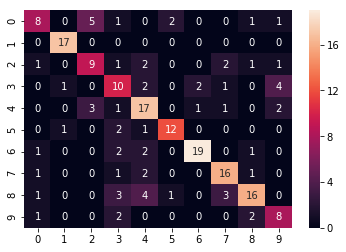

In [72]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

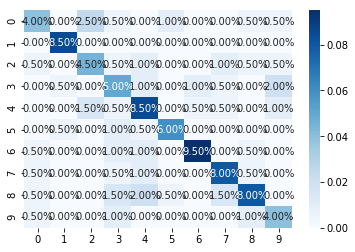

In [73]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

({0 :'blues', 1 :'classical', 2 :'country', 3 :'disco', 4 :'hiphop',
                     5 :'jazz', 6 :'metal', 7 :'pop', 8 :'reggae', 9 :'rock'})